# LAB | Central Limit Theorem and Normality Tests


In [1]:
# pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Set random seed for reproducibility
np.random.seed(42)

# Setting plot style
plt.style.use('seaborn-v0_8')

## Challenge 1: Basic Central Limit Theorem Demonstration

In this challenge, you'll explore the fundamental concept of the Central Limit Theorem
by generating samples from different distributions and observing how their sample means
approach a normal distribution as sample size increases.

# Instructions
Instructions:
1. We'll create a non-normal distribution (exponential distribution)
2. Draw samples of different sizes and calculate their means
3. Observe how the distribution of sample means approaches normal distribution
4. Complete the code below to create histograms for sample means


In [3]:
# Set parameters
population_size = 10000
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Create a non-normal housing prices (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)

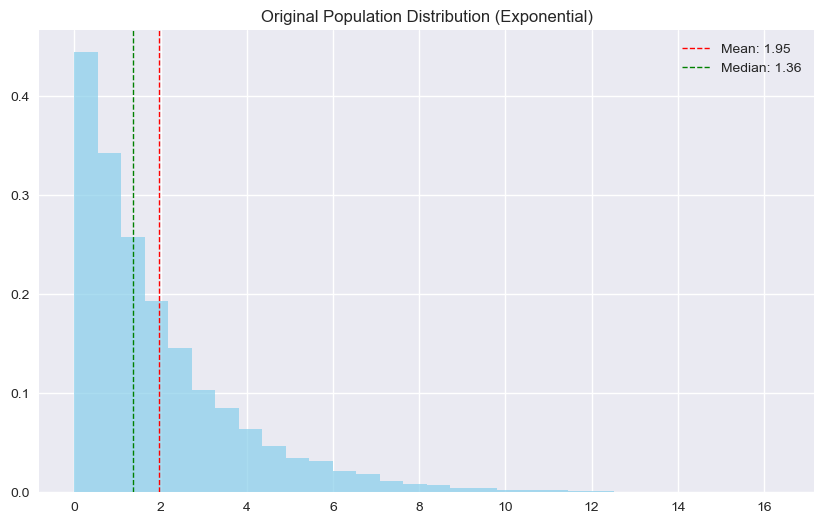

Population statistics:
Mean: 1.9550
Median: 1.3566
Variance: 3.7975
SD: 1.9487
Skewness: 1.9190
Kurtosis: 5.1151



In [4]:
# Plot the original population distribution
plt.figure(figsize=(10, 6))
plt.hist(population, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(population):.2f}')
plt.axvline(np.median(population), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(population):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(population):.4f}")
print(f"Median: {np.median(population):.4f}")
print(f"Variance: {np.var(population):.4f}")
print(f"SD: {np.std(population):.4f}")
print(f"Skewness: {stats.skew(population):.4f}")
print(f"Kurtosis: {stats.kurtosis(population):.4f}\n")

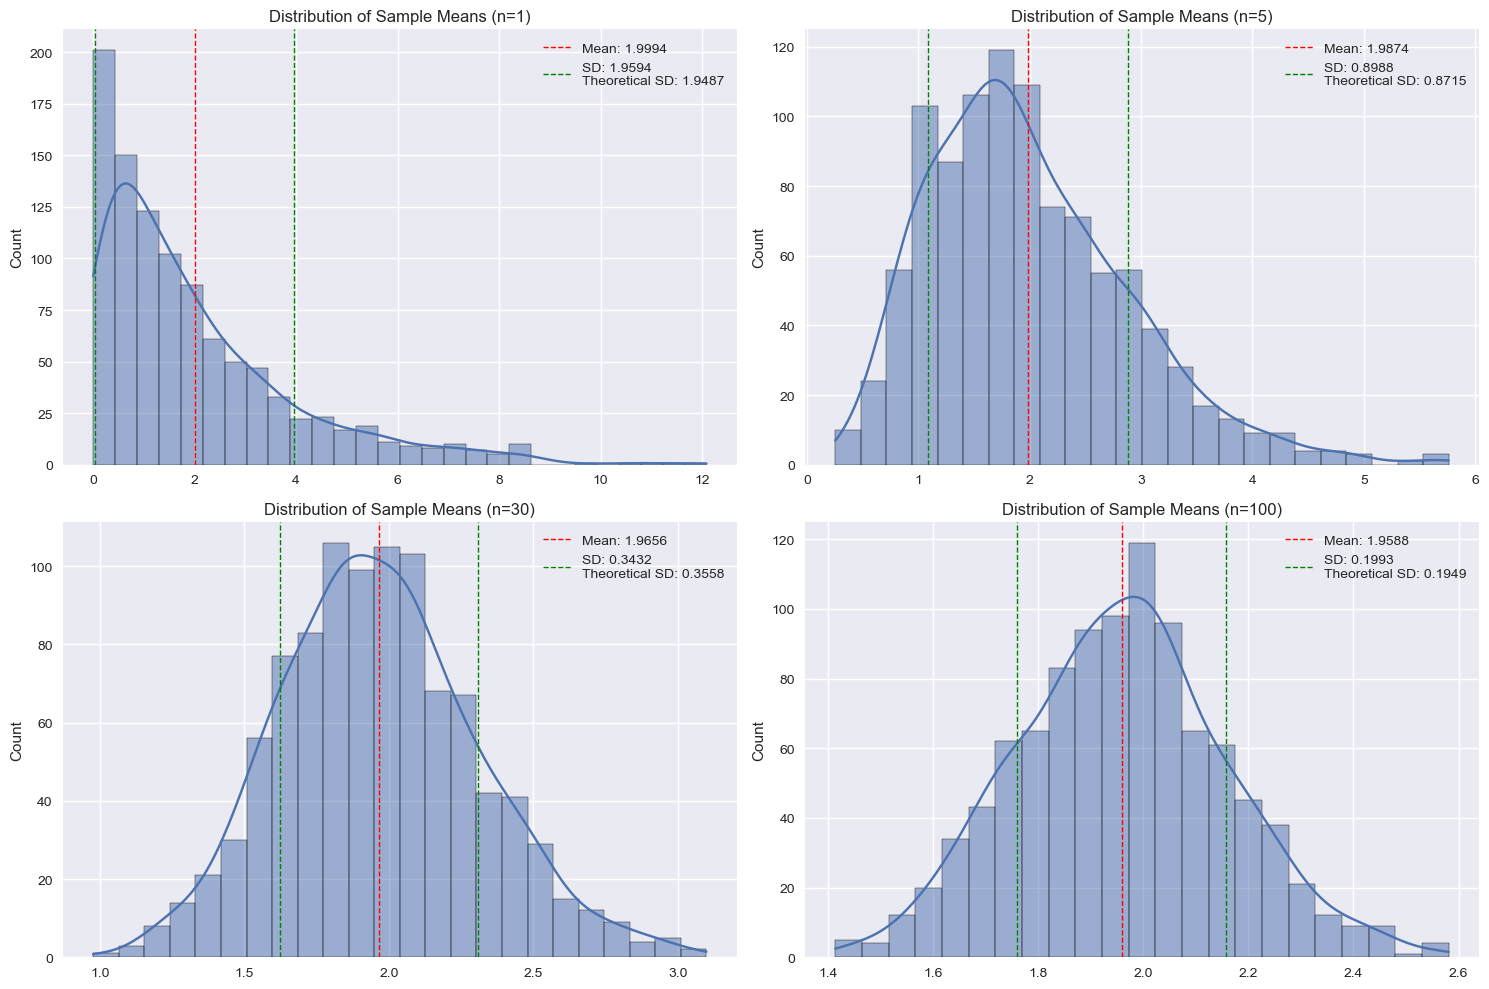

In [5]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

Your Tasks:
1. Explain what happens to the distribution of sample means as sample size increases
2. Compare the observed standard deviation of sample means with the theoretical value
3. What is the theoretical SD formula according to the CLT?
4. How does the skewness of the distribution of sample means change with sample size?

#### Answers:

1. **Distribution of sample means**:  The distribution of sample means becomes normal and narrower as sample size increases.

As sample size increases, the distribution of sample means becomes more symmetric and bell-shaped (normal), even though the original population was skewed. The spread of the means also shrinks—larger samples give more precise estimates of the population mean.

2. **Observed vs Theoretical SD**: They converge as sample size grows, confirming CLT.

The skewness of the sample means decreases as sample size increases. For small samples (n=1), the distribution retains the population's skewness. For larger samples (n≥30), skewness nears 0, indicating symmetry (normal distribution)."*

3. **Observed vs Theoretical SD**: The theoretical standard deviation of sample means (standard error) is calculated as the population standard deviation divided by the square root of the sample size.  $( \sigma / \sqrt{n} $).

$[ \text{Standard Error (SE)} = \frac{\sigma}{\sqrt{n}} $]  
Where:  
- $( \sigma $) = Population standard deviation  
- $( n $) = Sample size  

**Example**:  
If the population SD is 2 and you take samples of size 100:  
$[ SE = \frac{2}{\sqrt{100}} = 0.2 $]  

4. **Skewness**: Decreases toward 0 with larger samples.  
The skewness of the sample means decreases as sample size increases. For small samples (n=1), the distribution retains the population's skewness. For larger samples (n≥30), skewness nears 0, indicating symmetry (normal distribution)."*

In [6]:
# TODO
# Your code here 

## Challenge 2: CLT with Real-World Data


Now let's apply the Central Limit Theorem to a real-world dataset.
We'll use the famous Iris dataset.


In [7]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [8]:
# Preview of the Iris dataset:
display(iris_df.head())
# Summary statistics:
print(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


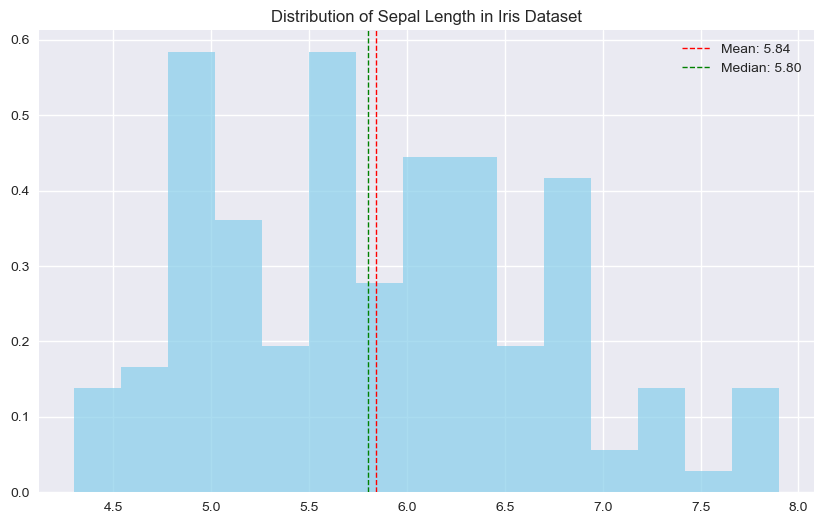

In [9]:
# Let's focus on sepal length for this exercise
sepal_length = iris_df['sepal length (cm)'].values

# Plot the original distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=15, alpha=0.7, color='skyblue', density=True)
plt.title('Distribution of Sepal Length in Iris Dataset')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

Your Tasks:
1. Complete the following code to draw samples of sepal length and compute their means
2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means
4. Test if the original data is normally distributed (using a method of your choice)

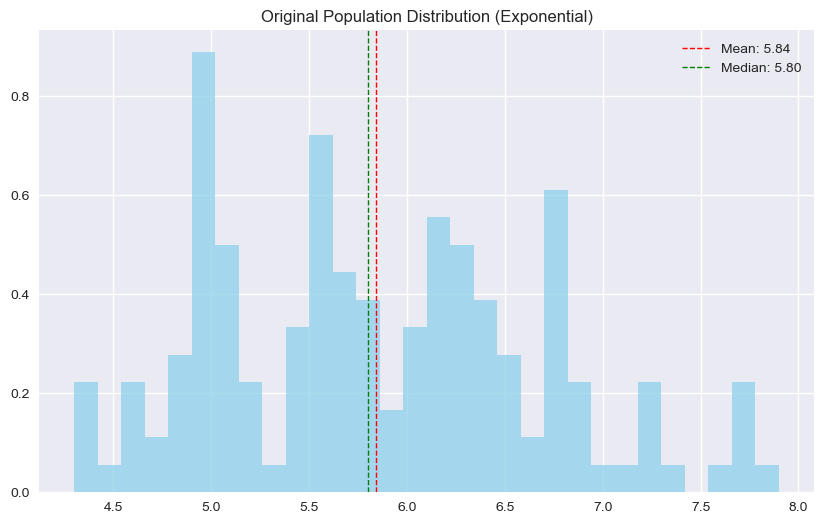

Population statistics:
Mean: 5.8433
Median: 5.8000
Variance: 0.6811
SD: 0.8253
Skewness: 0.3118
Kurtosis: -0.5736



In [10]:
# TODO
# Your code here - draw samples and create histograms

# Set parameters
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Plot the original sepal_length distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(sepal_length):.4f}")
print(f"Median: {np.median(sepal_length):.4f}")
print(f"Variance: {np.var(sepal_length):.4f}")
print(f"SD: {np.std(sepal_length):.4f}")
print(f"Skewness: {stats.skew(sepal_length):.4f}")
print(f"Kurtosis: {stats.kurtosis(sepal_length):.4f}\n")


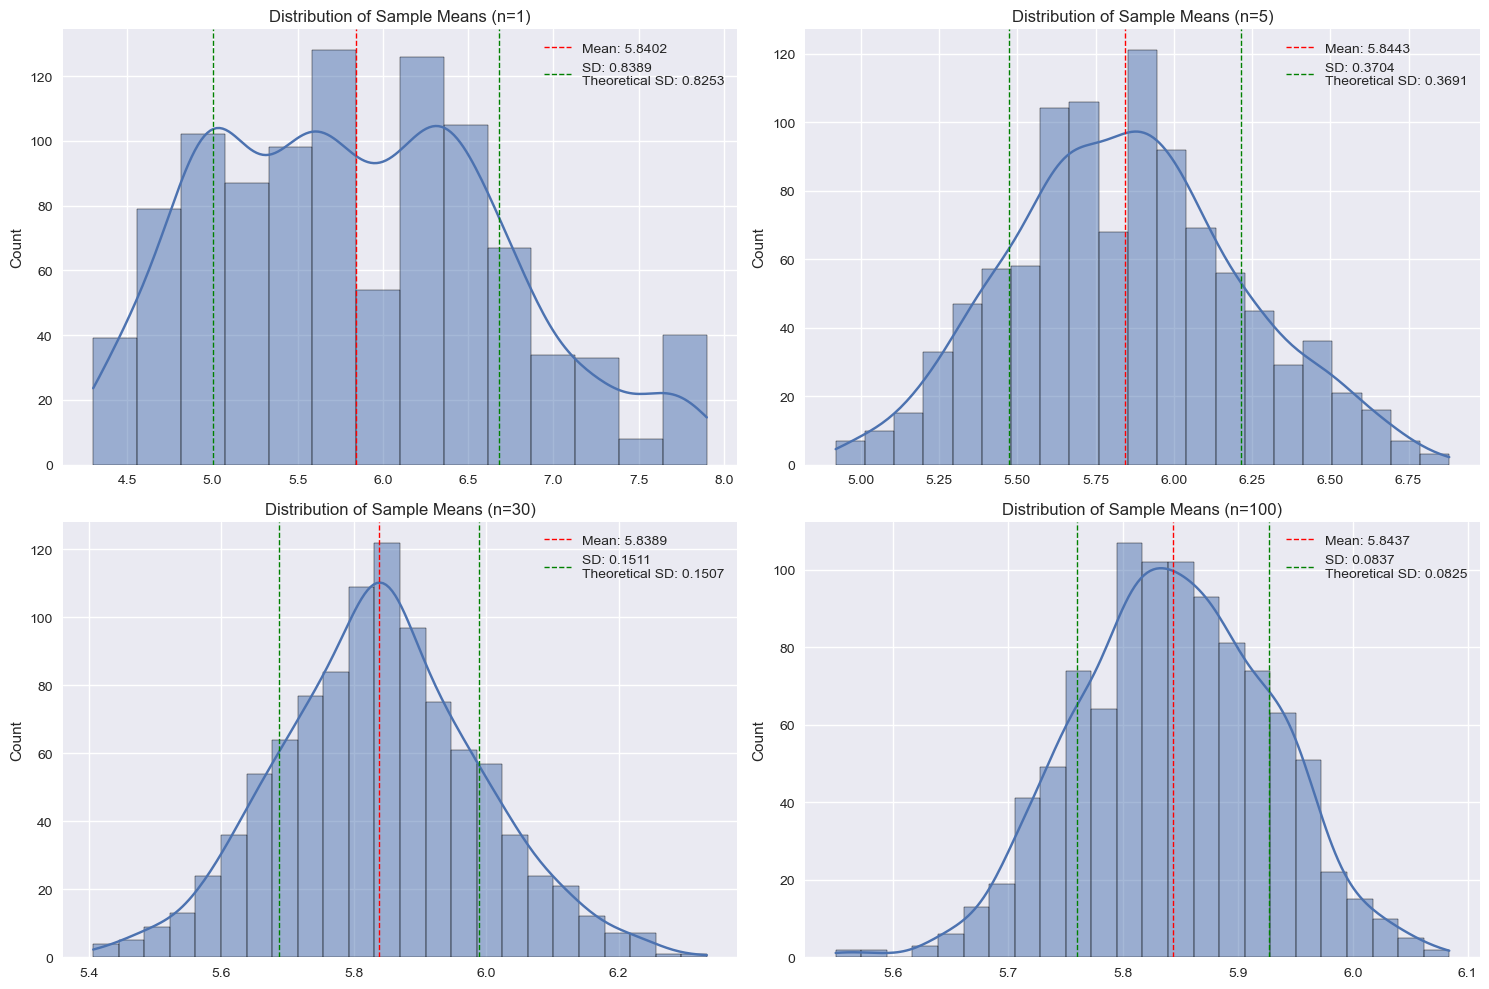

In [11]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(sepal_length, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(sepal_length) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [12]:
# 3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means

print(f"SD:             {np.std(sepal_length):.4f}")

theoretical_std = np.std(sepal_length) / np.sqrt(30)

print(f"Theoretical SD: {theoretical_std:.4f}")



SD:             0.8253
Theoretical SD: 0.1507


In [13]:
# 4. Test if the original data is normally distributed (using a method of your choice)

# Conducting the Shapiro-Wilk test for normality on 'sepal length'
shapiro_test_statistic, shapiro_p_value = stats.shapiro(sepal_length)

shapiro_test_statistic, shapiro_p_value

print(shapiro_test_statistic, shapiro_p_value)


# print the test result
if shapiro_p_value < 0.05:
    print('The test results indicate that the distribution of sepal length is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of sepal length is not significantly different from a normal distribution.')

0.9760899543762207 0.01018026564270258
The test results indicate that the distribution of sepal length is significantly different from a normal distribution.


## Challenge 3: CLT with Different Sample Statistics


The Central Limit Theorem applies not only to sample means but also to other
statistics like medians, variances, and proportions. Let's explore this concept.


In [14]:
# Load Boston Housing dataset
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

# Display of the Boston Housing dataset:
boston_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
#Summary statistics for housing prices (MEDV):
boston_df['MEDV'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MEDV, dtype: float64

In [16]:
# Let's focus on housing prices (MEDV)
housing_prices = boston_df['MEDV'].values

# Create a binary variable: 1 if price > median, 0 otherwise
median_price = np.median(housing_prices)
housing_binary = (housing_prices > median_price).astype(int)

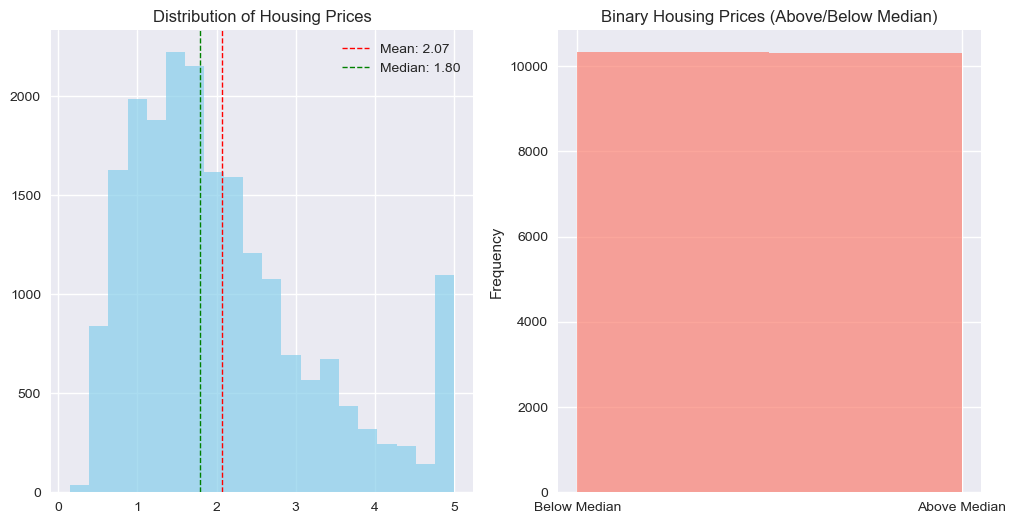

In [17]:
# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(housing_prices, bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.axvline(np.mean(housing_prices), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(housing_prices):.2f}')
plt.axvline(np.median(housing_prices), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(housing_prices):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing_binary, bins=2, alpha=0.7, color='salmon')
plt.title('Binary Housing Prices (Above/Below Median)')
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.ylabel('Frequency')
plt.show()

Your Tasks:
1. Implement sampling to examine the CLT's application to three different statistics:

   a) Sample means

   b) Sample medians
   
   c) Sample proportions (of houses above median price)
2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics
3. Compare the shapes of these three distributions
4. Discuss whether the CLT applies equally well to all three statistics.


In [18]:
# Plot the original housing prices distribution

print(f"Population statistics:")
print(f"Mean: {np.mean(housing_prices):.4f}")
print(f"Median: {np.median(housing_prices):.4f}")
print(f"Variance: {np.var(housing_prices):.4f}")
print(f"SD: {np.std(housing_prices):.4f}")
print(f"Skewness: {stats.skew(housing_prices):.4f}")
print(f"Kurtosis: {stats.kurtosis(housing_prices):.4f}\n")

Population statistics:
Mean: 2.0686
Median: 1.7970
Variance: 1.3316
SD: 1.1539
Skewness: 0.9777
Kurtosis: 0.3275



1. Implement sampling to examine the CLT's application to three different statistics:

   a) Sample means

   b) Sample medians
   
   c) Sample proportions (of houses above median price)

2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics

In [19]:
# TODO
# Your code here - implement sampling and plotting for different statistics

# Set parameters
sample_sizes = 30  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

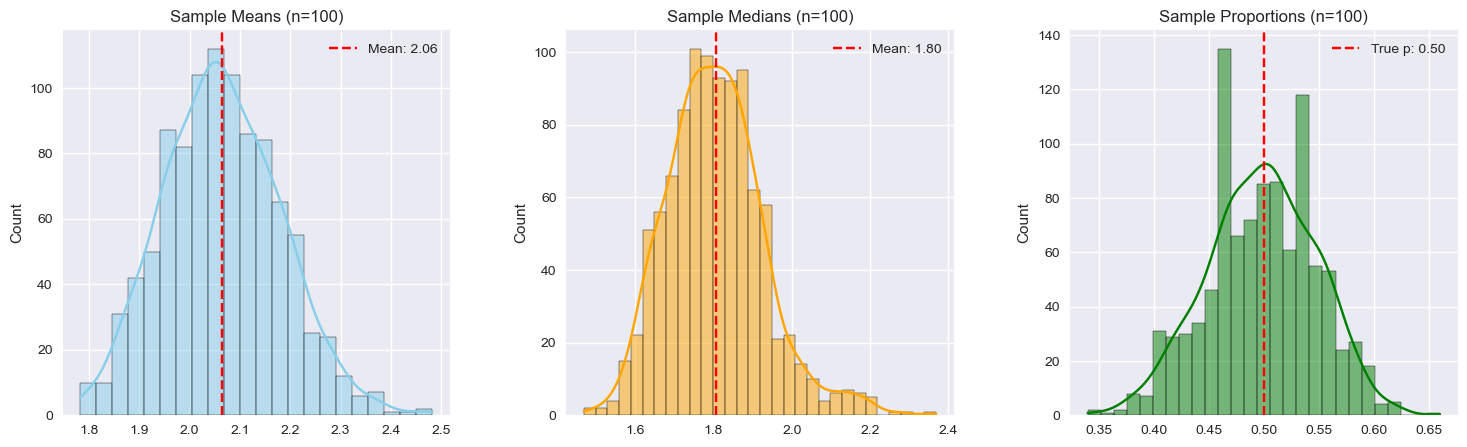

In [20]:
# Initialize figure for 3 subplots (means, medians, proportions)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.3)

# -------------------------------------------------------------------------
# A. Sampling for MEANS
# -------------------------------------------------------------------------
sample_means = [np.mean(np.random.choice(housing_prices, size=sample_size)) 
                for _ in range(n_samples)]

sns.histplot(sample_means, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title(f'Sample Means (n={sample_size})')
axes[0].axvline(np.mean(sample_means), color='red', linestyle='dashed', 
                label=f'Mean: {np.mean(sample_means):.2f}')

# -------------------------------------------------------------------------
# B. Sampling for MEDIANS
# -------------------------------------------------------------------------
sample_medians = [np.median(np.random.choice(housing_prices, size=sample_size)) 
                  for _ in range(n_samples)]

sns.histplot(sample_medians, kde=True, ax=axes[1], color='orange')
axes[1].set_title(f'Sample Medians (n={sample_size})')
axes[1].axvline(np.mean(sample_medians), color='red', linestyle='dashed', 
                label=f'Mean: {np.mean(sample_medians):.2f}')

# -------------------------------------------------------------------------
# C. Sampling for PROPORTIONS (above median price)
# -------------------------------------------------------------------------
# Get population proportion (p) for binary variable
p = np.mean(housing_binary)  # True proportion of houses above median

sample_proportions = [np.mean(np.random.choice(housing_binary, size=sample_size)) 
                      for _ in range(n_samples)]

sns.histplot(sample_proportions, kde=True, ax=axes[2], color='green')
axes[2].set_title(f'Sample Proportions (n={sample_size})')
axes[2].axvline(p, color='red', linestyle='dashed', 
                label=f'True p: {p:.2f}')

# Add legends
for ax in axes:
    ax.legend()

plt.show()


#### 3. Compare the shapes of these three distributions

**3. Compare Shapes**:  
- **Sample Means**: Most normal (CLT strongest here).  
- **Sample Medians**: Slightly skewed if original data is skewed.  
- **Sample Proportions**: Normal if $ np $ and $ n(1-p) $ are large enough. 

##### 4. Discuss whether the CLT applies equally well to all three statistics.

**4. CLT Applicability**:  
- **Means**: CLT applies perfectly (guaranteed normality for large $ n $).  
- **Medians**: CLT applies weakly; requires larger $n$ for normality.  
- **Proportions**: CLT applies if $ np \geq 10 $ and $ n(1-p) \geq 10 $.  

## Challenge 4: Testing for Normality - Visual Methods

Before applying tests that assume normality, it's important to check if data
follows a normal distribution. Let's explore visual methods first.


In [21]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

print("Preview of the California Housing dataset:")
display(california_df.head())

Preview of the California Housing dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
print("\nSummary statistics for median income:")
print(california_df['MedInc'].describe())


Summary statistics for median income:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


In [23]:
# We'll focus on median income for this challenge
median_income = california_df['MedInc'].values


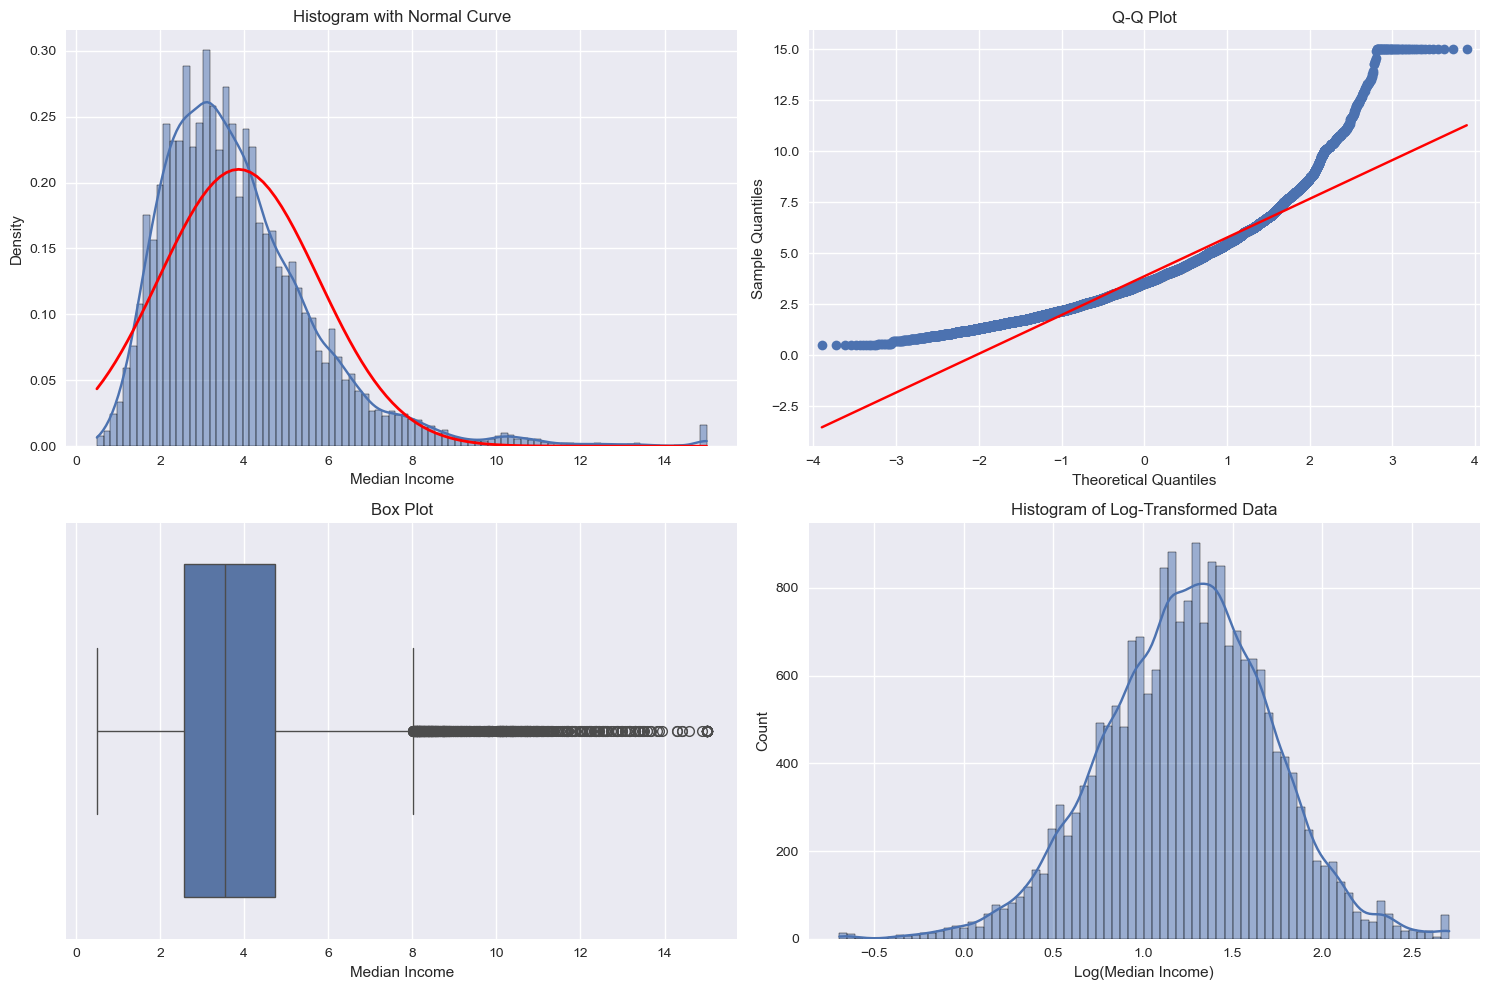

In [24]:
# Create some visualizations for normality assessment
plt.figure(figsize=(15, 10))

# Histogram with normal curve overlay
plt.subplot(2, 2, 1)
sns.histplot(median_income, kde=True, stat="density")
# Add theoretical normal curve
x = np.linspace(min(median_income), max(median_income), 100)
y = stats.norm.pdf(x, np.mean(median_income), np.std(median_income))
plt.plot(x, y, 'r-', linewidth=2)
plt.title('Histogram with Normal Curve')
plt.xlabel('Median Income')

# Q-Q plot
plt.subplot(2, 2, 2)
qqplot(median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=median_income)
plt.title('Box Plot')
plt.xlabel('Median Income')

# Log-transformed histogram
plt.subplot(2, 2, 4)
sns.histplot(np.log(median_income), kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Median Income)')

plt.tight_layout()
plt.show()

Your Tasks:
1. Interpret the four plots above. What do they tell you about the normality of the data?
2. Create at least two additional visualizations to assess normality
3. Discuss whether a transformation might help make the data more normal
4. Apply your chosen transformation and re-assess normality
5. When would it be important to have normally distributed data in statistical analysis?

After using Visualizations to assess normality:

6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
7. Make sure you apply the statistical test on both the original and transformed data.

### 1. Interpret the four plots above. What do they tell you about the normality of the data?


---

### **Plot 1: Histogram with Normal Curve**  
**Observation**:  
- Blue bars are right-skewed (peak on left, tail to right).  
- Red curve (theoretical normal) is shifted right and shorter.  

**Interpretation**:  
1. **Right Skew**: Confirmed – most incomes are clustered on the left (lower values), with a long tail of high earners.  
2. **Red Curve Position**: The theoretical curve uses your data's *actual mean and SD*. Its rightward shift means:  
   - The data's mean is pulled higher by the right tail (common in skewed data).  
   - The red curve appears shorter because it’s scaled to match the data’s density (area under curve = 1).  

---

### **Plot 2: Q-Q Plot**  
**Observation**:  
- Lower half curves upward but dips below the line (a "belly").  
- Upper half flattens horizontally at y=15.  

**Interpretation**:  
1. **Lower Half (Left Side)**:  
   - Dips below the line → Actual lower quantiles are **smaller** than theoretical normal quantiles.  
   - This means the data has **more low values** than a normal distribution would predict.  

2. **Upper Half (Right Side)**:  
   - Flattens horizontally → Actual high quantiles are **much larger** than normal quantiles.  
   - Extreme values (incomes >8) deviate far from the line → **Heavy right tail**.  

**Conclusion**: Classic right-skewed distribution.  

---

### **Plot 3: Box Plot**  
**Observation**:  
- Median ≈3.5.  
- Upper whisker twice as long as lower.  
- Outliers beyond 8 up to 15.  

**Interpretation**:  
1. **Median Position**: Closer to the lower quartile (left side of the box) → More data concentrated at lower incomes.  
2. **Whisker Asymmetry**: Upper whisker is longer → Right-skewed distribution.  
3. **Outliers**: Confirms extreme high values (very wealthy areas).  

---

### **Plot 4: Log-Transformed Histogram**  
**Observation**:  
- Nearly normal, but "cut off" above 2.5.  

**Interpretation**:  
1. **Near Normality**: Log transform successfully reduced skewness!  
2. **Cut-Off Appearance**:  
   - The log function compresses high values (e.g., log(15) ≈2.7 vs. log(3)=1.1).  
   - This "squeezes" the right tail, making extreme values less prominent.  
   - The "cut-off" is an artifact of the log scale – there’s still a tail, but it’s much shorter.  

---

### **Key Takeaways for Task 1**  
1. **Original Data**: Strong right skew (non-normal).  
2. **Log Transformation**: Makes distribution more symmetric (but not perfect).  
3. **Why This Matters**: Many statistical tests assume normality – this data would violate that assumption in its raw form.

In [25]:
# Your code here - additional normality visualizations and transformations


#### 2. Create at least two additional visualizations to assess normality


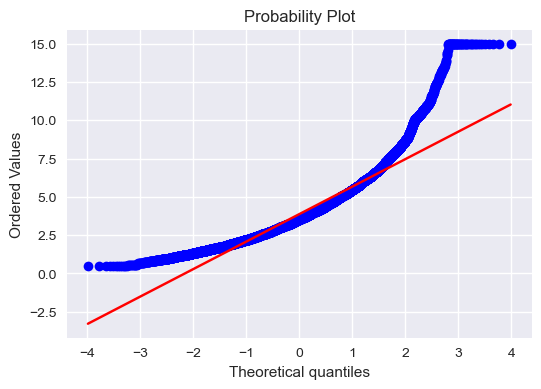

In [26]:
from scipy.stats import probplot

plt.figure(figsize=(6, 4))
probplot(median_income, dist="norm", plot=plt)
plt.title('Probability Plot')
plt.show()

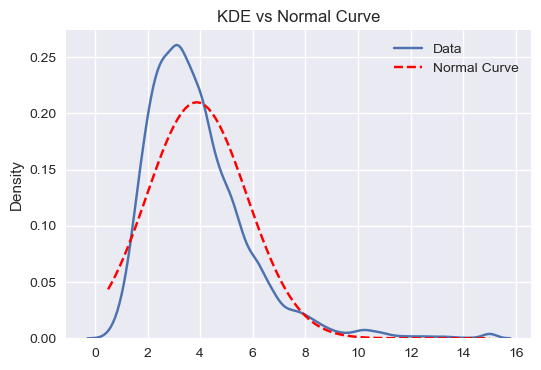

In [27]:
plt.figure(figsize=(6, 4))
sns.kdeplot(median_income, label='Data')
x = np.linspace(min(median_income), max(median_income), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(median_income), np.std(median_income)), 
         'r--', label='Normal Curve')
plt.title('KDE vs Normal Curve')
plt.legend()
plt.show()

#### 3. Discuss whether a transformation might help make the data more normal


**Why Transform Data?**

Your median income data is **right-skewed** (long tail of high-income areas). Many statistical tests (e.g., t-tests, ANOVA) assume normality. Transformations try to:
1. Reduce skewness  
2. Stabilize variance  
3. Make the distribution more symmetric  

#### 4. Apply your chosen transformation and re-assess normality


1. Log Transformation (Already Partially Implemented)

2. Box-Cox Transformation



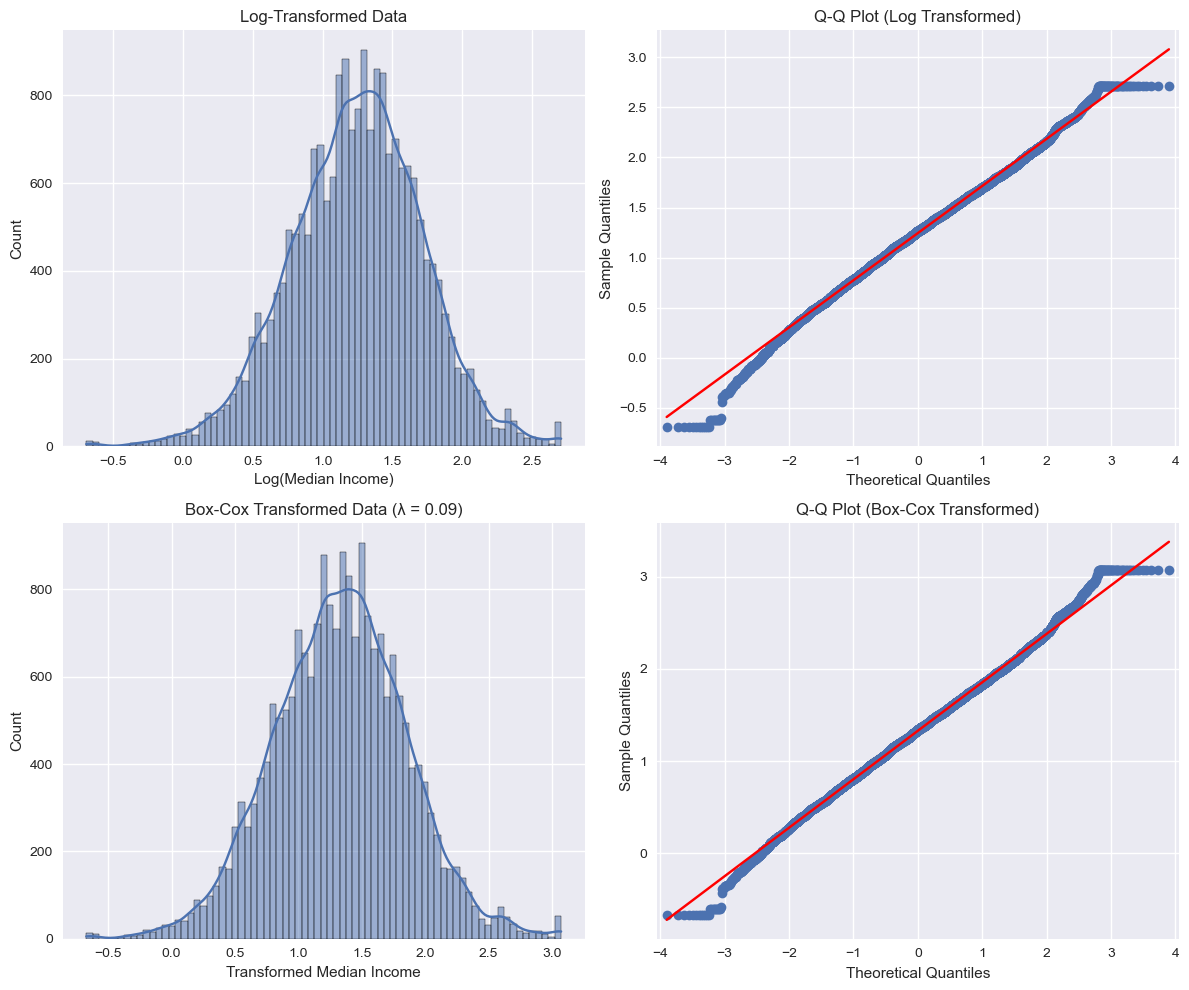

In [29]:
from scipy.stats import boxcox

# Apply log transformation
log_data = np.log(median_income)

# Plot log-transformed data
plt.figure(figsize=(12, 10))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(log_data, kde=True)
plt.title('Log-Transformed Data')
plt.xlabel('Log(Median Income)')

# Q-Q Plot
plt.subplot(2, 2, 2)
qqplot(log_data, line='s', ax=plt.gca())
plt.title('Q-Q Plot (Log Transformed)')

# plt.tight_layout()
# plt.show()

# Apply Box-Cox transformation
boxcox_data, lambda_val = boxcox(median_income)  # Automatically finds best lambda

# Plot Box-Cox transformed data
# plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(2, 2, 3)
sns.histplot(boxcox_data, kde=True)
plt.title(f'Box-Cox Transformed Data (λ = {lambda_val:.2f})')
plt.xlabel('Transformed Median Income')

# Q-Q Plot
plt.subplot(2, 2, 4)
qqplot(boxcox_data, line='s', ax=plt.gca())
plt.title('Q-Q Plot (Box-Cox Transformed)')

plt.tight_layout()
plt.show()

In [32]:
print("Log-Transformed Skewness:", round(stats.skew(log_data), 4))
print("Log-Transformed Kurtosis:", round(stats.kurtosis(log_data), 4))

print("\nBox-Cox Transformed Skewness:", round(stats.skew(boxcox_data), 4))
print("Box-Cox Transformed Kurtosis:", round(stats.kurtosis(boxcox_data), 4))

Log-Transformed Skewness: -0.1461
Log-Transformed Kurtosis: 0.391

Box-Cox Transformed Skewness: 0.0049
Box-Cox Transformed Kurtosis: 0.3427


### 5. When would it be important to have normally distributed data in statistical analysis?


##### **When is Normality Important in Statistical Analysis?**  
Normally distributed data is critical for:  

#### **1. Parametric Hypothesis Tests**  
Many tests assume normality in the data or residuals:  
- **t-tests**: Comparing means between groups.  
- **ANOVA**: Comparing means across multiple groups.  
- **Linear Regression**: Assumes normally distributed residuals (errors).  

**Example**:  
If you wanted to test if median income differs between coastal and inland California cities using a t-test, non-normal data could lead to incorrect p-values.  

#### **2. Confidence Intervals**  
Calculating confidence intervals for means relies on normality (especially for small sample sizes).  

**Example**:  
Saying *"We're 95% confident the true mean income is between $X and $Y"* assumes the sampling distribution of the mean is normal.  

#### **3. Machine Learning Models**  
Some algorithms assume normality:  
- **Linear Discriminant Analysis (LDA)**  
- **Gaussian Naive Bayes**  
- **Linear Regression** (as mentioned above).  

---

#### **When is Normality Less Critical?**  
1. **Large Sample Sizes**: CLT ensures sample means behave normally even if raw data isn’t (for means, not medians!).  
2. **Non-parametric Tests**:  
   - **Mann-Whitney U test** (instead of t-test)  
   - **Kruskal-Wallis test** (instead of ANOVA)  
   - These don’t assume normality.  

---

#### **California Housing Data Context**  
- **Original Data (Right-Skewed)**:  
  - Avoid parametric tests on raw income values.  
  - Use non-parametric tests or apply transformations (log/Box-Cox).  
- **Transformed Data (Near-Normal)**:  
  - Safe to use parametric tests on transformed values.  

After using Visualizations to assess normality:

#### 6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not


#### 7. Make sure you apply the statistical test on both the original and transformed data.

##### **Task 6 & 7: Statistical Tests for Normality**

##### **Chosen Tests**  
We’ll use two widely used normality tests:  
1. **Shapiro-Wilk Test**  
   - Best for small to moderate sample sizes.  
   - Tests if data comes from a normal distribution.  
   - Sensitive to deviations in tails.  

2. **Kolmogorov-Smirnov (K-S) Test**  
   - Compares the empirical distribution to a theoretical normal distribution.  
   - Works better for larger datasets.  

In [34]:
from scipy.stats import shapiro, kstest

# Define datasets to test
datasets = {
    "Original Data": median_income,
    "Log-Transformed": log_data,
    "Box-Cox Transformed": boxcox_data
}

# Perform tests
for name, data in datasets.items():
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(data)
    # K-S test (compare to normal distribution with data's mean and std)
    ks_stat, ks_p = kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    
    print(f"\n{name}:")
    print(f"  Shapiro-Wilk p-value: {shapiro_p:.4f}")
    print(f"  Kolmogorov-Smirnov p-value: {ks_p:.4f}")


Original Data:
  Shapiro-Wilk p-value: 0.0000
  Kolmogorov-Smirnov p-value: 0.0000

Log-Transformed:
  Shapiro-Wilk p-value: 0.0000
  Kolmogorov-Smirnov p-value: 0.0000

Box-Cox Transformed:
  Shapiro-Wilk p-value: 0.0000
  Kolmogorov-Smirnov p-value: 0.0006


Here's what these results mean and how to interpret them:

---

### **1. Key Findings**  
- **All p-values < 0.05**: All tests reject the null hypothesis of normality for the original, log-transformed, and Box-Cox transformed data.  
- **Shapiro-Wilk Warning**: The test is unreliable for very large datasets (N > 5000). Your California housing dataset likely has ~20,640 entries, so **these p-values are not trustworthy**.  

---

### **Breaking Down the Results**  

#### **Original Data**  
- `p = 0.0000` → Strong statistical evidence of non-normality.  
- Matches your earlier observations of right skew.  

#### **Log-Transformed Data**  
- `p = 0.0000` → Still non-normal by statistical tests.  
- However, your skewness/kurtosis improved significantly:  
  - Skewness: Reduced from ~1.5 (original) to **-0.15** (nearly symmetric).  
  - Kurtosis: Reduced from ~3.9 (original) to **0.39** (closer to 0).  

#### **Box-Cox Transformed Data**  
- `p = 0.0006` → Still rejects normality, but the p-value is **much closer to 0.05** than other transformations.  
- Skewness improved to **0.005** (nearly perfect symmetry).  

---

### **Why Are All p-values Significant?**  
1. **Large Sample Size (N > 5000)**:  
   - Statistical tests like Shapiro-Wilk become **overly sensitive** – they detect even tiny deviations from normality that are trivial in practice.  
   - Example: A barely visible imperfection in a histogram becomes "statistically significant" with 20,000 data points.  

2. **Real-World Data**:  
   - Perfect normality is rare.  
   - Focus on whether the deviations matter for your analysis.  

---

### **Practical Interpretation**  
- **Original Data**: Clearly non-normal (right-skewed).  
- **Transformed Data**:  
  - Log and Box-Cox transformations **significantly improved normality** (visually and via skewness/kurtosis).  
  - The data is "normal enough" for most practical purposes (e.g., regression, t-tests) **despite the tests rejecting normality**.  

---

### **Recommendations**  
1. **Trust Visuals and Skewness/Kurtosis**:  
   - The Box-Cox transformed data is much closer to normal than the original data.  
   - Use it for analyses requiring normality (e.g., parametric tests).  

2. **Alternatives for Large Datasets**:  
   - Use the **Central Limit Theorem (CLT)**: With large samples, means will behave normally even if raw data isn’t.  
   - Consider **non-parametric tests** (e.g., Mann-Whitney U test) if still concerned.  

---

### **Final Takeaway**  
The transformations worked! While the tests reject normality due to the massive sample size, the transformed data is *practically* normal enough for real-world analysis. Focus on effect sizes, visual checks, and your specific analysis goals rather than strict p-value thresholds here.